In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle

In [2]:
data = pd.read_csv(r"D:\Sparkradix_Data_Science_Trainer\ZomatoData_Rating_Prediction_Project\dataset\ZomatoData.csv", encoding='latin-1')
print(data.shape)
data.head(3)

(9551, 19)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4


In [3]:
data.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Votes                   1012
Average Cost for two     140
Rating                    33
dtype: int64

In [4]:
# Missing Value
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Votes                   0
Average Cost for two    0
Rating                  0
dtype: int64

In [5]:
# Missing Value Treatment
data["Cuisines"].fillna("Unkown", inplace = True)
data.isnull().sum()

C:\Users\quadi\AppData\Local\Temp\ipykernel_13248\3953840400.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Cuisines"].fillna("Unkown", inplace = True)


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Votes                   0
Average Cost for two    0
Rating                  0
dtype: int64

In [6]:
# Basic Cleaning
data.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1826
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Votes                   1012
Average Cost for two     140
Rating                    33
dtype: int64

In [7]:
# Duplicate Value Treatment
print(data.shape)
data = data.drop_duplicates(subset='Restaurant ID')
data= data.dropna(subset=['Rating', 'Average Cost for two', 'Votes', 'Cuisines'])
print(data.shape)

(9551, 19)
(9551, 19)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Currency              9551 non-null   object 
 11  Has Table booking     9551 non-null   object 
 12  Has Online delivery   9551 non-null   object 
 13  Is delivering now     9551 non-null   object 
 14  Switch to order menu  9551 non-null   object 
 15  Price range          

In [9]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8


In [10]:
# Encoding categorical variables
label_encoders = {}
categorical_cols = ['Country Code', 'City', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Price range']
categorical_cols

['Country Code',
 'City',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Price range']

In [11]:
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

In [12]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
0,6317637,Le Petit Souffle,3,73,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",0,1,0,0,No,2,314,1100,4.8
1,6304287,Izakaya Kikufuji,3,73,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,0,1,0,0,No,2,591,1200,4.5
2,6300002,Heat - Edsa Shangri-La,3,75,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",0,1,0,0,No,3,270,4000,4.4
3,6318506,Ooma,3,75,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",0,0,0,0,No,3,365,1500,4.9
4,6314302,Sambo Kojin,3,75,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",0,1,0,0,No,3,229,1500,4.8


In [13]:
data['Currency'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [14]:
# new data created
data = data[['Currency', 'Has Table booking',	'Has Online delivery', 'Is delivering now',	'Price range', 'Votes',	'Average Cost for two', 'Rating']]

X = data[['Currency', 'Has Table booking',	'Has Online delivery', 'Is delivering now',	'Price range', 'Votes',	'Average Cost for two']]
y = data['Rating']
column = ['Currency', 'Has Table booking',	'Has Online delivery', 'Is delivering now',	'Price range', 'Votes',	'Average Cost for two']
column

['Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Price range',
 'Votes',
 'Average Cost for two']

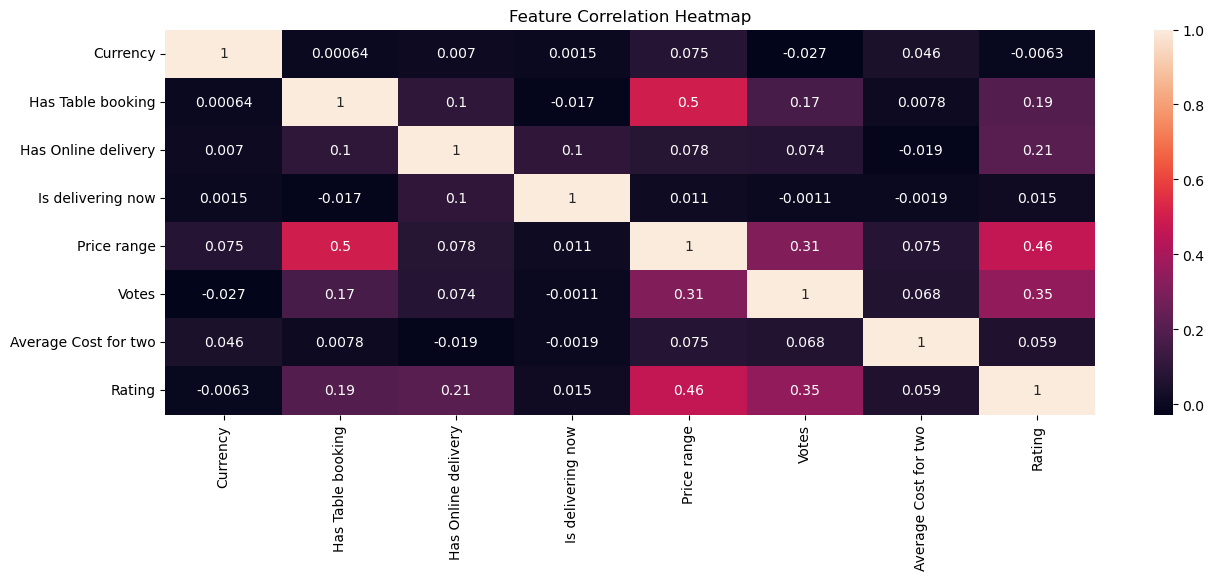

In [15]:
# feature selection
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(), annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

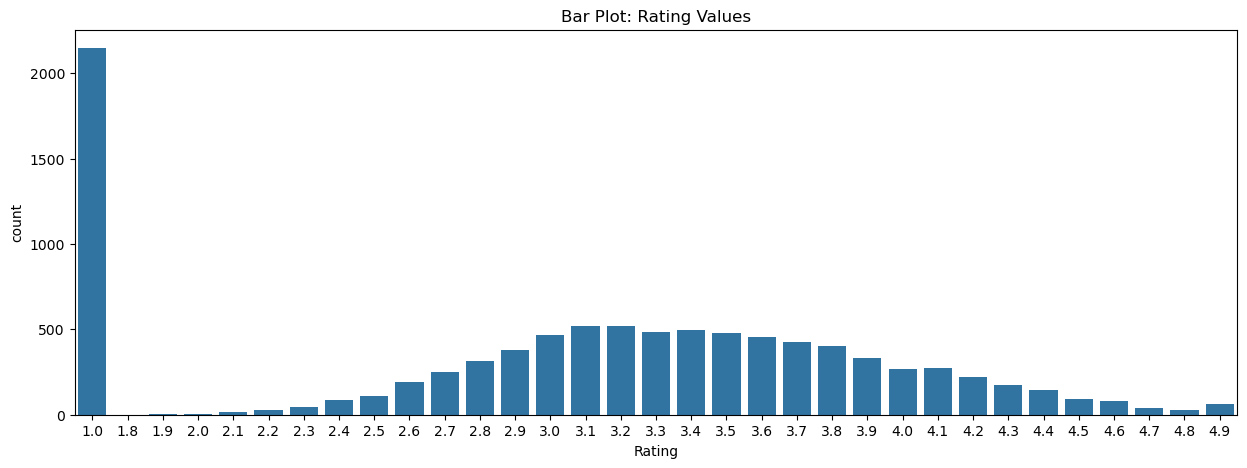

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(x='Rating', data=data)
plt.title("Bar Plot: Rating Values")
plt.show()

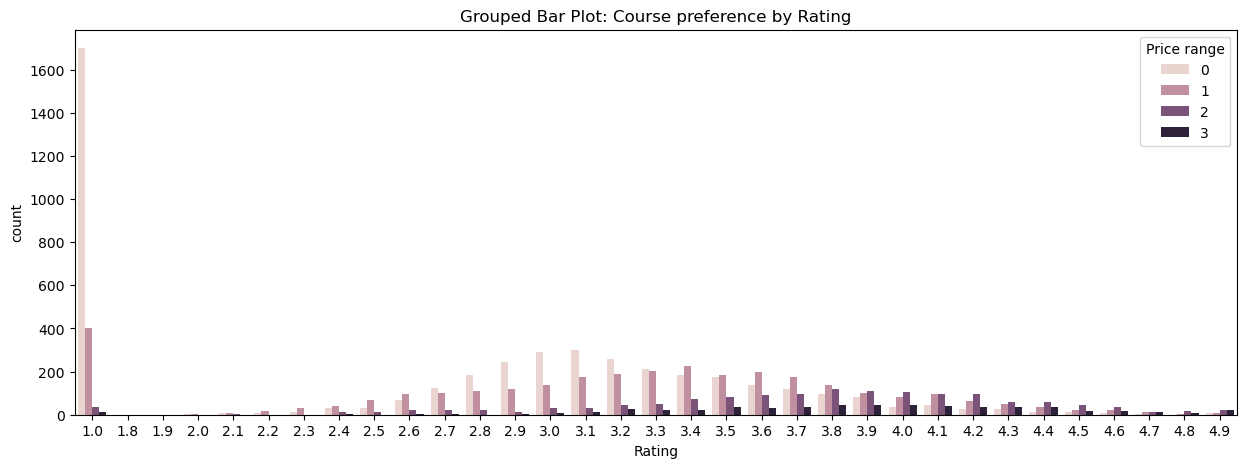

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(x='Rating', hue='Price range', data=data)
plt.title("Grouped Bar Plot: Course preference by Rating")
plt.show()

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[0]
# never scale the target variable or y

array([-4.3510457 ,  2.69218148, -0.58754682, -0.05977085,  1.31980312,
        0.36520164, -0.00615438])

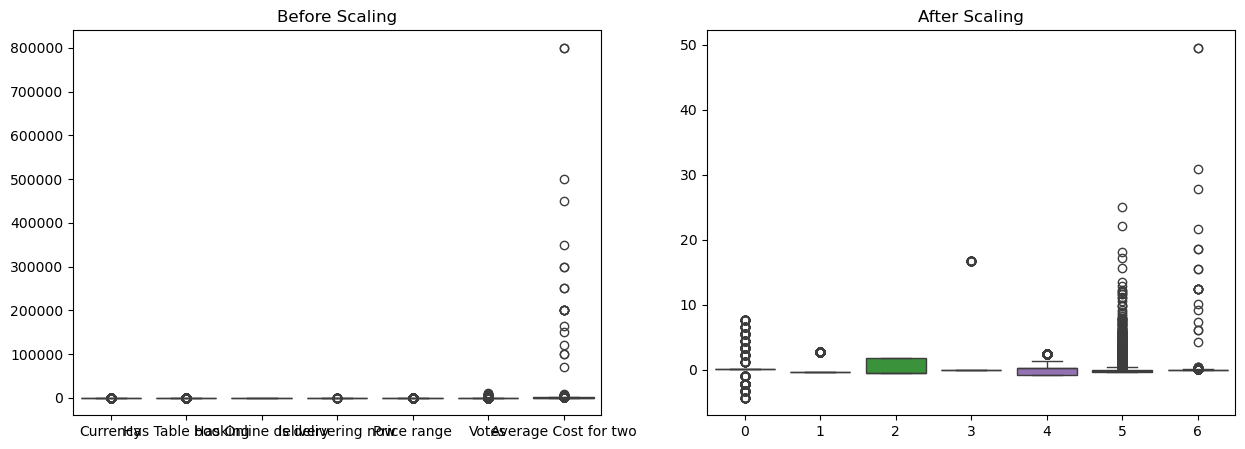

In [19]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))
sns.boxplot(data=X, ax=axes[0])
axes[0].set_title("Before Scaling")

sns.boxplot(data=X_scaled, ax=axes[1])
axes[1].set_title("After Scaling")
plt.show()

In [20]:
data.shape

(9551, 8)

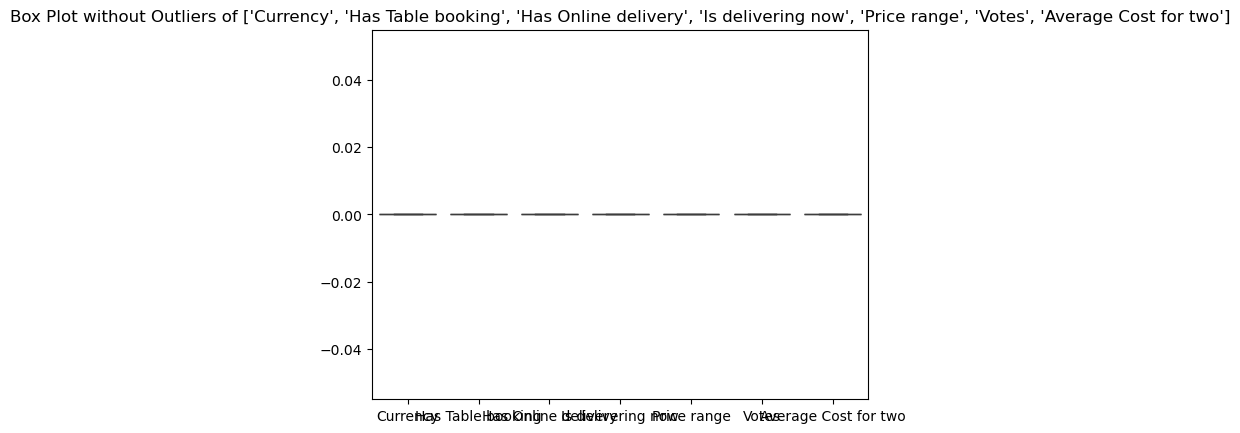

In [21]:
# outlier detection and removal
def removal_box_plot(data, column, threshold):
    removed_outliers = data[data[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers


threshold_value = 0.12

no_outliers = removal_box_plot(data, column, threshold_value)

In [22]:
print(data.shape)
print(no_outliers)
print(no_outliers.isnull().sum())

(9551, 8)
      Currency  Has Table booking  Has Online delivery  Is delivering now  \
0          0.0                NaN                  0.0                0.0   
1          0.0                NaN                  0.0                0.0   
2          0.0                NaN                  0.0                0.0   
3          0.0                0.0                  0.0                0.0   
4          0.0                NaN                  0.0                0.0   
...        ...                ...                  ...                ...   
9546       NaN                0.0                  0.0                0.0   
9547       NaN                0.0                  0.0                0.0   
9548       NaN                0.0                  0.0                0.0   
9549       NaN                0.0                  0.0                0.0   
9550       NaN                0.0                  0.0                0.0   

      Price range  Votes  Average Cost for two  Rating  
0       

In [23]:
# fig, axes = plt.subplots(1,2, figsize=(15, 5))
# sns.boxplot(data=X_scaled, ax=axes[0])
# axes[0].set_title("Before Outlier Removal")

# sns.boxplot(data=no_outliers, ax=axes[1])
# axes[1].set_title("After Outlier Removal")
# plt.show()

In [24]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

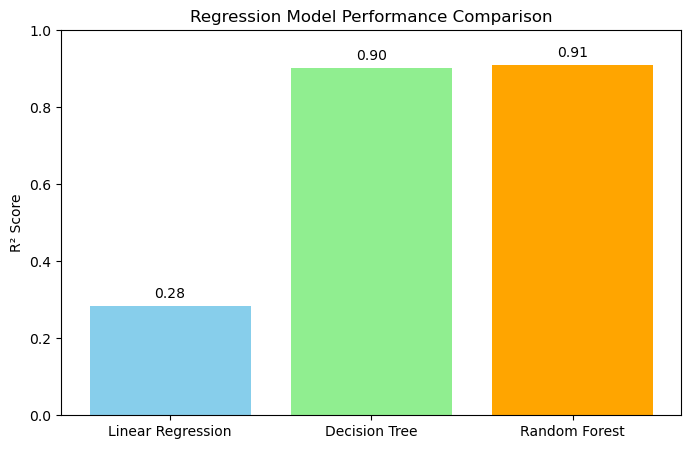

In [26]:
# Collect models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
}

# Store results
scores = {}

for name, model in models.items():
    model.fit(X_train, y_train) # model training
    y_pred = model.predict(X_test) # model testing
    scores[name] = r2_score(y_test, y_pred) # model evaluate

# Bar chart
plt.figure(figsize=(8,5))
plt.bar(scores.keys(), scores.values(), color=['skyblue','lightgreen','orange','purple'])
plt.ylabel("R² Score")
plt.title("Regression Model Performance Comparison")
plt.ylim(0,1)  # R² ranges between -∞ and 1
for i, (name, score) in enumerate(scores.items()):
    plt.text(i, score+0.02, f"{score:.2f}", ha='center', fontsize=10)
plt.show()

In [27]:
model

RandomForestRegressor(max_depth=10, random_state=42)

In [28]:
# exit from the current folder. Current foler - notebook folder
import os

model_folder = os.path.join('..','model') # enter model folder after exiting notebook folder
os.makedirs(model_folder, exist_ok=True) # create if not exists

In [29]:
pickle.dump(model, open(os.path.join(model_folder, 'zomato_model.pkl'), 'wb'))
pickle.dump(scaler, open(os.path.join(model_folder, 'scaler.pkl'), 'wb'))
print('Model and Scaler saved successfully')

Model and Scaler saved successfully


In [30]:
# File Manipulation in Python - os.path.join 
# Pickle